# Dataset

In [1]:
!pip install seaborn

# Imports
import os, warnings
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import tensorflow as tf
import pandas as pd
from os import listdir
from os.path import isfile, join
from shutil import rmtree
from tensorflow import keras
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.callbacks import ModelCheckpoint,  ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.layers import Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.datasets import make_classification

In [ ]:
# Move the uploaded 'kaggle.json' file to the correct directory using the following code:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/

# Info on how to get your api key (kaggle.json) here: https://github.com/Kaggle/kaggle-api#api-credentials
!pip install kaggle

# Set the appropriate permissions for the kaggle.json file using the following code:
!chmod 600 ~/.kaggle/kaggle.json

# Download datasets
!kaggle datasets download -d imrankhan77/nct-crc-he-100k
!kaggle datasets download -d imrankhan77/crc-val-he-7k

# Unzip it
!unzip nct-crc-he-100k.zip 
!unzip crc-val-he-7k.zip 

# Remove Zip file
os.remove("nct-crc-he-100k.zip")
os.remove("crc-val-he-7k.zip")

     |████████████████████████████████| 63 kB 3.3 MB/s             
  Preparing metadata (setup.py) ... done
     |████████████████████████████████| 78 kB 12.9 MB/s            
  Created wheel for kaggle: filename=kaggle-1.5.13-py3-none-any.whl size=77721 sha256=8ddf607126d4818d87e2c34108a1cdb5ab0e50d6f0434fcfb845cb00be408790
  Stored in directory: /root/.cache/pip/wheels/0d/b9/0b/e4d463da8c4bcacf15dc7cce2b68f811ed8491d444fb97da1c
Successfully built kaggle
100%|██████████████████████████████████████▉| 11.2G/11.2G [01:40<00:00, 162MB/s]
100%|███████████████████████████████████████| 11.2G/11.2G [01:40<00:00, 119MB/s]
 99%|████████████████████████████████████████▍| 776M/787M [00:07<00:00, 108MB/s]
100%|█████████████████████████████████████████| 787M/787M [00:07<00:00, 108MB/s]
Archive:  nct-crc-he-100k.zip
  inflating: NCT-CRC-HE-100K/ADI/ADI-AAAMHQMK.tif  
  inflating: NCT-CRC-HE-100K/ADI/ADI-AACCGLYD.tif  
  inflating: NCT-CRC-HE-100K/ADI/ADI-AACVGRFT.tif  
  inflating: NCT-CRC-HE-100K/

In [2]:

main_path = 'NCT-CRC-HE-100K'
sub_dir =os.listdir(main_path)

Data_df=pd.DataFrame({'ID': [], 'Class':[]})

for subdir in sub_dir:
    mypath = join(main_path,subdir)
    files=[f for f in listdir(mypath)]
    classes=[subdir for c in files]
    files_df = pd.DataFrame({'ID':files, 'Class':classes})
    Data_df = Data_df.append(files_df)

Data_df

,ID,Class
0,MUC-MPAYGGIH.tif,MUC
1,MUC-FCQLATPS.tif,MUC
2,MUC-HGCLWHTH.tif,MUC
3,MUC-SFCIVINH.tif,MUC
4,MUC-WWEDCMHH.tif,MUC
...,...,...
14312,TUM-RTCNCACH.tif,TUM
14313,TUM-RQRFDRNQ.tif,TUM
14314,TUM-EYNIDRSK.tif,TUM
14315,TUM-NYMTAVQF.tif,TUM


In [3]:
# Distribution of the Classes
class_of_patch = Data_df.Class.value_counts()
print('the distribution of classes:\n{}'.format(class_of_patch[::-1]))

the distribution of classes:
NORM     8763
MUC      8896
ADI     10407
STR     10446
BACK    10566
DEB     11512
LYM     11557
MUS     13536
TUM     14317
Name: Class, dtype: int64


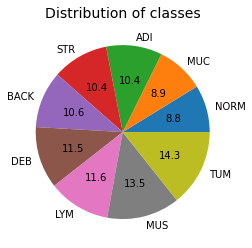

In [4]:
class_of_patch_labels = ['NORM','MUC','ADI','STR','BACK','DEB','LYM','MUS','TUM']
class_of_patch_values = class_of_patch[::-1]

plt.pie(class_of_patch_values, labels=class_of_patch_labels, startangle=0, autopct='%1.1f')
plt.title('Distribution of classes', fontsize=14)
plt.show()


In [5]:
# !python3 -m pip install opencv-python
# !pip3 install opencv-python
# !pip3 install opencv-python
# !conda install -c conda-forge opencv


In [12]:
import cv2

fig, axs = plt.subplots(9, 6, figsize=(9, 17))
fig.suptitle('Dataset samples presentation', size=24)

for i, cls in enumerate(sub_dir):
    samples = Data_df[Data_df['Class'] == cls].sample(6)
    for j, img_path in enumerate(samples['ID']):
        img = cv2.imread(join(main_path, cls, img_path))
        axs[i, j].imshow(img)
        axs[i, j].set_xticks([])
        axs[i, j].set_yticks([])
    axs[i, 0].set_ylabel(cls, size=20)

ImportError: libGL.so.1: cannot open shared object file: No such file or directory

In [6]:
# Split into train and test
train_df, test_df = train_test_split(Data_df, test_size=0.15, random_state=42, shuffle=True, stratify=Data_df['Class'])

# Split train set into train and validation
train_df, val_df = train_test_split(train_df, test_size=0.176471, random_state=42, shuffle=True, stratify=train_df['Class'])

Class Distribution of Training Examples:
TUM     10021
MUS      9475
LYM      8090
DEB      8058
BACK     7396
STR      7312
ADI      7285
MUC      6228
NORM     6134
Name: Class, dtype: int64 

Class Distribution of Validation Examples:
TUM     2148
MUS     2031
LYM     1733
DEB     1727
BACK    1585
STR     1567
ADI     1561
MUC     1334
NORM    1315
Name: Class, dtype: int64 

Class Distribution of Test Examples:
TUM     2148
MUS     2030
LYM     1734
DEB     1727
BACK    1585
STR     1567
ADI     1561
MUC     1334
NORM    1314
Name: Class, dtype: int64 



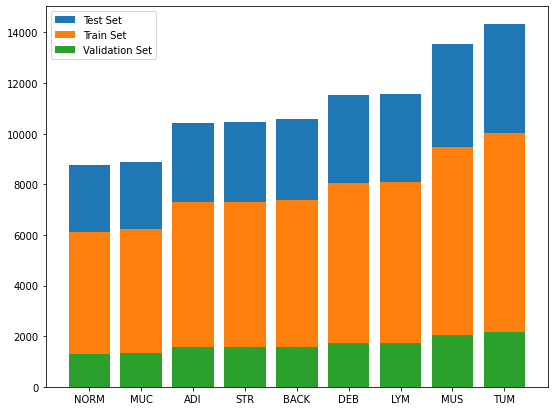

In [7]:
# Check the distribution of data in training and validation sets
train_val_test_data = [train_df, val_df, test_df]
data_names = ['Training', 'Validation', 'Test']

for i, data in enumerate(train_val_test_data):
    class_of_data_patch = data.Class.value_counts()
    print('Class Distribution of {} Examples:\n{}'.format(data_names[i], class_of_data_patch), '\n')
    
# Bar plot for checking the distribution
class_of_train_patch = train_df.Class.value_counts()
class_of_val_patch = val_df.Class.value_counts()
class_of_test_patch = test_df.Class.value_counts()

bar_fig, bar_axis = plt.subplots(figsize=(9,7))

sub_dir_list =  ['NORM', 'MUC', 'ADI', 'STR', 'BACK', 'DEB', 'LYM', 'MUS', 'TUM']

bar_axis.bar(sub_dir_list, class_of_patch[::-1], label='Test Set')
bar_axis.bar(sub_dir_list, class_of_train_patch[::-1], label='Train Set')
bar_axis.bar(sub_dir_list, class_of_val_patch[::-1], label='Validation Set')

bar_axis.legend()


In [16]:
main_dir = 'Dataset'
os.makedirs(main_dir, exist_ok=True)

train_dir = os.path.join(main_dir, 'Training')
os.makedirs(train_dir, exist_ok=True)

val_dir = os.path.join(main_dir, 'Validation')
os.makedirs(val_dir, exist_ok=True)

test_dir = os.path.join(main_dir, 'Test')
os.makedirs(test_dir, exist_ok=True)

for cls in sub_dir:
    train_sub_dir = os.path.join(train_dir, cls)
    os.makedirs(train_sub_dir, exist_ok=True)

    val_sub_dir = os.path.join(val_dir, cls)
    os.makedirs(val_sub_dir, exist_ok=True)

    test_sub_dir = os.path.join(test_dir, cls)
    os.makedirs(test_sub_dir, exist_ok=True)


In [17]:
from tqdm import tqdm
import shutil

Data_df.set_index('ID', inplace=True)

for img, label in tqdm(zip(train_df['ID'], train_df['Class']), desc='Copying train images'):
    source = join(main_path, label, img)
    dest = join(train_dir, label)
    shutil.copy(source, dest)

for img, label in tqdm(zip(val_df['ID'], val_df['Class']), desc='Copying validation images'):
    source = join(main_path, label, img)
    dest = join(val_dir, label)
    shutil.copy(source, dest)

for img, label in tqdm(zip(test_df['ID'], test_df['Class']), desc='Copying test images'):
    source = join(main_path, label, img)
    dest = join(test_dir, label)
    shutil.copy(source, dest)


Copying train images: 69999it [02:02, 573.74it/s] 
Copying validation images: 15001it [00:28, 517.50it/s]
Copying test images: 15000it [00:36, 412.37it/s]


## Training the Vision Transformer on a Custom Dataset

In this notebook, we are going to fine-tune a pre-trained Vision Transformer (which can be found from [Huggingface](https://github.com/huggingface/transformers)) on a Custom Dataset. For this notebook we will be using the Rock, Paper, Scissors dataset which can be found [here](https://public.roboflow.com/classification/rock-paper-scissors/1). This dataset is a collection of 2925 images images in 3 different classes. This tutorial is based on Huggingface's [Fine tuning the Vision Transformer on CIFAR 10 notebook](https://colab.research.google.com/github/NielsRogge/Transformers-Tutorials/blob/master/VisionTransformer/Fine_tuning_the_Vision_Transformer_on_CIFAR_10_with_the_%F0%9F%A4%97_Trainer.ipynb).

### Accompanying Blog Post

We recommend that you follow along in this notebook while reading the blog post on [How to Train the HuggingFace Vision Transformer On a Custom Dataset](blog.roboflow.com/how-to-train-the-huggingface-vision-transformer-on-a-custom-dataset/) concurrently.


We will prepare the data using [Roboflow's Preprocessing Tools](https://docs.roboflow.com/image-transformations/image-preprocessing), and train the model using this notebook. 

### Steps Covered in this Tutorial

In this tutorial, we will walk through the steps required to train a Vision Transformer on your custom classification data.

To train our image classifier we take the following steps:

* Install Vision Transformer dependencies
* Download custom Image Classification data using Roboflow
* Use the Vision Transformer Feature Extractor
* Run the Vision Transformer training procedure
* Evaluate the Vision Transformer on a test image
* Export the Vision Transformer model for future inference


### **About**

[Roboflow](https://roboflow.com) enables teams to deploy custom computer vision models quickly and accurately. Convert data from to annotation format, assess dataset health, preprocess, augment, and more. It's free for your first 1000 source images.

**Looking for a vision model available via API without hassle? Try Roboflow Train.**

![Roboflow Wordmark](https://i.imgur.com/dcLNMhV.png)



Let's start by installing the relevant libraries.

In [8]:
# !pip install -q git+https://github.com/huggingface/transformers
# !pip install huggingface-hub==0.4.0
# !pip install transformers
# !pip install --upgrade pip
# !pip install huggingface-hub==0.0.12
# !conda install -c huggingface transformers
# !git clone https://github.com/huggingface/transformers.git


# Download the Data 

We'll preprocess and download our dataset from Roboflow. To preprocess the images, change the size of the image to 224x224. To download the dataset, use the "**Folder Structure**" export format.

To get your data into Roboflow, follow the [Getting Started Guide](https://blog.roboflow.ai/getting-started-with-roboflow/).

Note: This data has already been preprocessed through Roboflow; we HIGHLY reccommend you follow the [accompanying blog](blog.roboflow.com/how-to-train-the-huggingface-vision-transformer-on-a-custom-dataset/) as you go through this notebook.

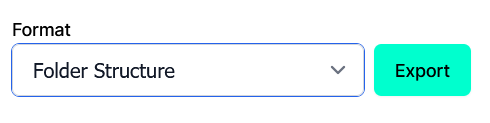

In [9]:
# !curl -L "https://app.roboflow.com/ds/[YOUR-KEY-HERE]" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

Next, convert the folder structure dataset into a PyTorch dataset format using PyTorch's ImageFolder dataset structure:

In [10]:
# !pip install torchvision
import torchvision
from torchvision.transforms import ToTensor

train_ds = torchvision.datasets.ImageFolder('Dataset/Training', transform=ToTensor())
valid_ds = torchvision.datasets.ImageFolder('Dataset/Validation', transform=ToTensor())
test_ds = torchvision.datasets.ImageFolder('Dataset/Test', transform=ToTensor())

## Define the Model

Here we define the model.

The model itself uses a linear layer on top of a pre-trained `ViTModel`. We place a linear layer on top of the last hidden state of the [CLS] token, which serves as a good representation of an entire image. We also add dropout for regularization.

**Note:** The Vision Transformer pretrained model can be used as a regular PyTorch layer.

In [11]:
# # Clear pip cache: There might be issues with the cached package information. 
# # You can try clearing the pip cache and then reinstalling the package:
# !pip cache purge
# !pip install huggingface-hub

In [12]:
from transformers import ViTModel
from transformers.modeling_outputs import SequenceClassifierOutput
import torch.nn as nn
import torch.nn.functional as F

class ViTForImageClassification(nn.Module):
    def __init__(self, num_labels=9):
        super(ViTForImageClassification, self).__init__()
        self.vit = ViTModel.from_pretrained('google/vit-base-patch16-224-in21k')
        self.dropout = nn.Dropout(0.1)
        self.classifier = nn.Linear(self.vit.config.hidden_size, num_labels)
        self.num_labels = num_labels

    def forward(self, pixel_values, labels):
        outputs = self.vit(pixel_values=pixel_values)
        output = self.dropout(outputs.last_hidden_state[:,0])
        logits = self.classifier(output)

        loss = None
        if labels is not None:
          loss_fct = nn.CrossEntropyLoss()
          loss = loss_fct(logits.view(-1, self.num_labels), labels.view(-1))
        if loss is not None:
          return logits, loss.item()
        else:
          return logits, None

In [13]:
# import shutil

# # Remove the folder and its contents
# shutil.rmtree("transformers")

## Define the Model Parameters

To train this model, we will train in 3 epochs, with a batch size of 10 and a learning rate of 2e-5:

In [15]:
EPOCHS = 3
BATCH_SIZE = 16
LEARNING_RATE = 0.0001

We will use the pretrained Vision Transformer feature extractor, an Adam Optimizer, and a Cross Entropy Loss function.

In [16]:
# !pip install --upgrade jupyter
# !pip install --upgrade ipywidgets
# # len(train_ds.classes)
# print(len(train_loader))
# x2=1
# for step, (x, y) in enumerate(train_loader):
#     print(step, end=',')
#     x2+=1
#     if (x2==100):
#         break

In [17]:
from transformers import ViTFeatureExtractor
import torch.nn as nn
import torch

# Define Model
model = ViTForImageClassification(len(train_ds.classes))    
# Feature Extractor
feature_extractor = ViTFeatureExtractor.from_pretrained('google/vit-base-patch16-224-in21k')
# Adam Optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)
# Cross Entropy Loss
loss_func = nn.CrossEntropyLoss()
# Use GPU if available  
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu') 
if torch.cuda.is_available():
    model.cuda() 

## Train the Model

In [21]:
# !pip install torch torchvision

import torch.utils.data as data
from torch.autograd import Variable
import numpy as np

print("Number of train samples: ", len(train_ds))
print("Number of test samples: ", len(test_ds))
print("Detected Classes are: ", train_ds.class_to_idx) 

# train_loader = data.DataLoader(train_ds, batch_size=BATCH_SIZE, shuffle=True,  num_workers=4)
train_loader = data.DataLoader(train_ds, batch_size=BATCH_SIZE, shuffle=True)
test_loader  = data.DataLoader(test_ds, batch_size=BATCH_SIZE, shuffle=True) 

Number of train samples:  69999
Number of test samples:  15000
Detected Classes are:  {'ADI': 0, 'BACK': 1, 'DEB': 2, 'LYM': 3, 'MUC': 4, 'MUS': 5, 'NORM': 6, 'STR': 7, 'TUM': 8}


In [22]:
# Train the model
for epoch in range(EPOCHS):        
  for step, (x, y) in enumerate(train_loader):
    
    # Change input array into list with each batch being one element
    x = np.split(np.squeeze(np.array(x)), BATCH_SIZE)
    
    # Remove unecessary dimension
    for index, array in enumerate(x):
      x[index] = np.squeeze(array)
    
    # Apply feature extractor, stack back into 1 tensor and then convert to tensor
    x = torch.tensor(np.stack(feature_extractor(x)['pixel_values'], axis=0))
    
    # Send to GPU if available
    x, y  = x.to(device), y.to(device)
    b_x = Variable(x)   # batch x (image)
    b_y = Variable(y)   # batch y (target)
    
    # Feed through model
    output, loss = model(b_x, None)
    
    # Calculate loss
    if loss is None: 
      loss = loss_func(output, b_y)   
      optimizer.zero_grad()           
      loss.backward()                 
      optimizer.step()

    if step % 50 == 0:
      print(" ============== STEP: " + str(step) + "/" + str(len(train_loader)) + " =============== ")
    
      # Get the next batch for testing purposes
      test = next(iter(test_loader))
      test_x = test[0]
      # Reshape and get feature matrices as needed
      test_x = np.split(np.squeeze(np.array(test_x)), BATCH_SIZE)
      for index, array in enumerate(test_x):
        test_x[index] = np.squeeze(array)
      test_x = torch.tensor(np.stack(feature_extractor(test_x)['pixel_values'], axis=0))
      # Send to appropirate computing device
      test_x = test_x.to(device)
      test_y = test[1].to(device)
      # Get output (+ respective class) and compare to target
      test_output, loss = model(test_x, test_y)
      test_output = test_output.argmax(1)
      # Calculate Accuracy
      accuracy = (test_output == test_y).sum().item() / BATCH_SIZE
      print('Epoch: ', epoch, '| train loss: %.4f' % loss, '| test accuracy: %.2f' % accuracy)
    
    if step >= len(train_loader)/2:
        break

 =========== this is step 0/4375 ============ 
Epoch:  0 | train loss: 0.4300 | test accuracy: 1.00
 =========== this is step 50/4375 ============ 
Epoch:  0 | train loss: 0.4673 | test accuracy: 0.88
 =========== this is step 100/4375 ============ 
Epoch:  0 | train loss: 0.1521 | test accuracy: 1.00
 =========== this is step 150/4375 ============ 
Epoch:  0 | train loss: 0.5561 | test accuracy: 0.81
 =========== this is step 200/4375 ============ 
Epoch:  0 | train loss: 0.4738 | test accuracy: 0.88
 =========== this is step 250/4375 ============ 
Epoch:  0 | train loss: 0.1025 | test accuracy: 1.00
 =========== this is step 300/4375 ============ 
Epoch:  0 | train loss: 0.3545 | test accuracy: 0.88
 =========== this is step 350/4375 ============ 
Epoch:  0 | train loss: 0.2571 | test accuracy: 0.94
 =========== this is step 400/4375 ============ 
Epoch:  0 | train loss: 0.0580 | test accuracy: 1.00
 =========== this is step 450/4375 ============ 
Epoch:  0 | train loss: 0.0423 | tes

## Evaluate on a Test Image

Finally, let's evaluate the model on a test image:

torch.Size([1, 3, 224, 224])


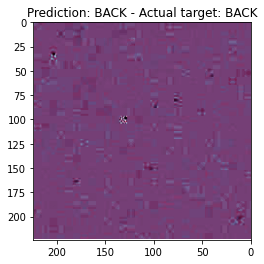

In [26]:
import matplotlib.pyplot as plt
import numpy as np

EVAL_BATCH = 1
# I remove the num_workers=4
eval_loader  = data.DataLoader(valid_ds, batch_size=EVAL_BATCH, shuffle=True) 

# Disable grad
with torch.no_grad():
    
  inputs, target = next(iter(eval_loader))
  # Reshape and get feature matrices as needed
  print(inputs.shape)
  inputs = inputs[0].permute(1, 2, 0)
  # Save original Input
  originalInput = inputs
  for index, array in enumerate(inputs):
    inputs[index] = np.squeeze(array)
  inputs = torch.tensor(np.stack(feature_extractor(inputs)['pixel_values'], axis=0))

  # Send to appropriate computing device
  inputs = inputs.to(device)
  target = target.to(device)
 
  # Generate prediction
  prediction, loss = model(inputs, target)
    
  # Predicted class value using argmax
  predicted_class = np.argmax(prediction.cpu())
  value_predicted = list(valid_ds.class_to_idx.keys())[list(valid_ds.class_to_idx.values()).index(predicted_class)]
  value_target = list(valid_ds.class_to_idx.keys())[list(valid_ds.class_to_idx.values()).index(target)]
        
  # Show result
  plt.imshow(originalInput)
  plt.xlim(224,0)
  plt.ylim(224,0)
  plt.title(f'Prediction: {value_predicted} - Actual target: {value_target}')
  plt.show()

# Test on entire Testset NCT-CRC-HE-100K

=========== eval 1000 ==============
=========== eval 2000 ==============
=========== eval 3000 ==============
=========== eval 4000 ==============
=========== eval 5000 ==============
=========== eval 6000 ==============
=========== eval 7000 ==============
=========== eval 8000 ==============
=========== eval 9000 ==============
=========== eval 10000 ==============
=========== eval 11000 ==============
=========== eval 12000 ==============
=========== eval 13000 ==============
=========== eval 14000 ==============
=========== eval 15000 ==============
Total Accuracy: 0.84


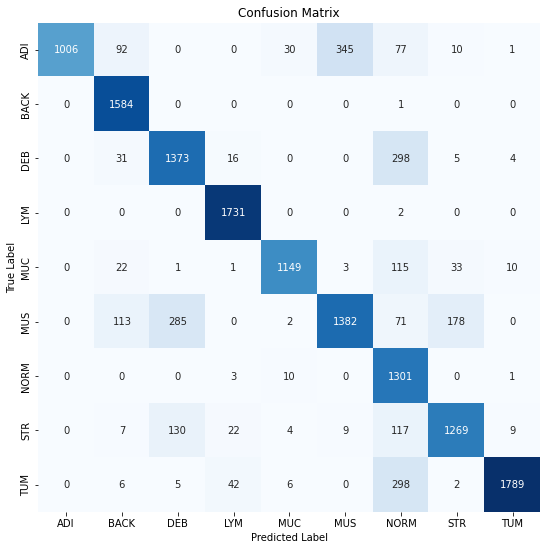

In [34]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix

# Load the external dataset (crc-val-he-7k)
eval_loader = data.DataLoader(valid_ds, batch_size=EVAL_BATCH, shuffle=True) 

# Disable grad
with torch.no_grad():
    predicted_labels = []
    true_labels = []

    i=0
    for inputs, targets in eval_loader:
        i+=1
        if i % 1000 == 0:
            print("=========== eval "+ str(i) +" ==============")
            
        inputs = inputs.to(device)
        targets = targets.to(device)

        # Generate prediction
        predictions, _ = model(inputs, targets)

        # Predicted class values using argmax
        predicted_classes = torch.argmax(predictions, dim=1)

        # Append predicted and true labels
        predicted_labels.extend(predicted_classes.cpu().numpy())
        true_labels.extend(targets.cpu().numpy())

    # Calculate accuracy
    accuracy = accuracy_score(true_labels, predicted_labels)
    print(f'Total Accuracy: {accuracy:.2f}')

    # Calculate confusion matrix
    cm = confusion_matrix(true_labels, predicted_labels)
    classes = list(valid_ds.class_to_idx.keys())

    # Plot confusion matrix with numbers
    plt.figure(figsize=(len(classes), len(classes)))
    sns.heatmap(cm, annot=True, fmt="d", cmap=plt.cm.Blues, cbar=False,
                xticklabels=classes, yticklabels=classes)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()



# Test on CRC-VAL-HE-7K

=========== eval 100 ==============
=========== eval 200 ==============
=========== eval 300 ==============
=========== eval 400 ==============
=========== eval 500 ==============
=========== eval 600 ==============
=========== eval 700 ==============
=========== eval 800 ==============
=========== eval 900 ==============
=========== eval 1000 ==============
=========== eval 1100 ==============
=========== eval 1200 ==============
=========== eval 1300 ==============
=========== eval 1400 ==============
=========== eval 1500 ==============
=========== eval 1600 ==============
=========== eval 1700 ==============
=========== eval 1800 ==============
=========== eval 1900 ==============
=========== eval 2000 ==============
=========== eval 2100 ==============
=========== eval 2200 ==============
=========== eval 2300 ==============
=========== eval 2400 ==============
=========== eval 2500 ==============
=========== eval 2600 ==============
=========== eval 2700 ==============
==========

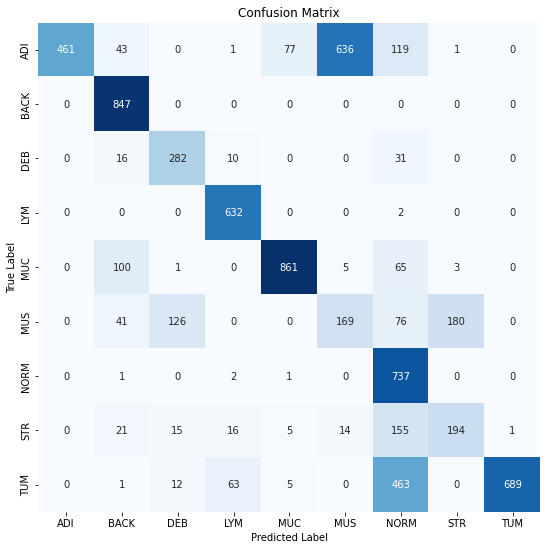

In [33]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix

# Load the external dataset (crc-val-he-7k)
valid_ds2 = torchvision.datasets.ImageFolder('CRC-VAL-HE-7K', transform=ToTensor())
eval_loader = data.DataLoader(valid_ds2, batch_size=EVAL_BATCH, shuffle=True) 

# Disable grad
with torch.no_grad():
    predicted_labels = []
    true_labels = []

    i=0
    for inputs, targets in eval_loader:
        i+=1
        if i % 100 == 0:
            print("=========== eval "+ str(i) +" ==============")
            
        inputs = inputs.to(device)
        targets = targets.to(device)

        # Generate prediction
        predictions, _ = model(inputs, targets)

        # Predicted class values using argmax
        predicted_classes = torch.argmax(predictions, dim=1)

        # Append predicted and true labels
        predicted_labels.extend(predicted_classes.cpu().numpy())
        true_labels.extend(targets.cpu().numpy())

    # Calculate accuracy
    accuracy = accuracy_score(true_labels, predicted_labels)
    print(f'Total Accuracy: {accuracy:.2f}')

    # Calculate confusion matrix
    cm = confusion_matrix(true_labels, predicted_labels)
    classes = list(valid_ds.class_to_idx.keys())

    # Plot confusion matrix with numbers
    plt.figure(figsize=(len(classes), len(classes)))
    sns.heatmap(cm, annot=True, fmt="d", cmap=plt.cm.Blues, cbar=False,
                xticklabels=classes, yticklabels=classes)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()



## Save the Entire Model

We can save the entire model as follows:

In [35]:
torch.save(model, 'model.pt')

## Export Trained Model

Now that you have trained your custom vision transformer, you can export the trained model you have made here for inference on your device elsewhere

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

%cp /content/model.pt /content/gdrive/My\ Drive

Mounted at /content/gdrive


## Use your Exported Model

In [31]:
MODEL_PATH = 'model.pt'
model = torch.load(MODEL_PATH)
model.eval()

ViTForImageClassification(
  (vit): ViTModel(
    (embeddings): ViTEmbeddings(
      (patch_embeddings): PatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): ViTEncoder(
      (layer): ModuleList(
        (0): ViTLayer(
          (attention): ViTAttention(
            (attention): ViTSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
            (output): ViTSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          (intermediate): ViTIntermediate(
            (dense): Linear(in_features=768, out_fea